In [1]:
versioninfo()

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, skylake)


## Common packages

In [2]:
using Printf
using LinearAlgebra
using Random
using FFTW

## External libraries

In [3]:
include("../extlibs/extlibs.jl");

## Constants

In [4]:
const Ry2eV = 13.605693009;
const ANG2BOHR = 1.8897261254578281;

## Type aliases

In [5]:
const BlochWavefunc = Array{Array{ComplexF64,2},1};
const Wavefunc = Array{ComplexF64,2};

## Atoms, lattice, etc

In [6]:
include("../src/Atoms.jl");

include("../src/gen_lattice_pwscf.jl");

include("../src/spglib.jl");

include("../src/KPoints.jl");

include("../src/XSF_utils.jl");

include("../src/Utilities.jl");

include("../src/ortho_gram_schmidt.jl");
include("../src/ortho_sqrt.jl");
include("../src/ortho_check.jl");

include("../src/Ylm_real.jl");
include("../src/Ylm_complex.jl");

include("../src/fft_support.jl");

include("../src/PWGrid.jl");

op_nabla_dot (generic function with 1 method)

In [11]:
include("PsPot_GTH_mod.jl");

eval_proj_G (generic function with 2 methods)

In [12]:
include("../src/wrappers_fft.jl");
include("../src/Electrons.jl");
include("../src/calc_strfact.jl");
include("../src/init_V_coulomb_G.jl");

mutable struct XCFuncType
end
include("../src/LDA_VWN.jl");
include("../src/GGA_PBE.jl");

# KSDFT Hamiltonian in plane wave basis

Structure factor:
$$
S_{s}(\mathbf{G}) = \sum_{a=1}^{N_{a}(s)} e^{\imath \mathbf{G}\cdot\mathbf{r}_{as}}
$$

Form factor of the spherically symmtric local potential is:
$$
\Phi_{s}(\mathbf{G}) = \frac{4\pi}{\Omega} \int_{0}^{\infty} r^2 j_{0}(r\left|\mathbf{G}\right|) V_{s}^{\mathrm{ps,local}}\,\mathrm{d}r
$$

In [1]:
using SpecialFunctions

In [ ]:
besselj0(x)

In [2]:
using PGFPlotsX

┌ Info: Recompiling stale cache file /home/efefer/.julia/compiled/v1.1/PGFPlotsX/ckKEQ.ji for PGFPlotsX [8314cec4-20b6-5062-9cdb-752b83310925]
└ @ Base loading.jl:1184


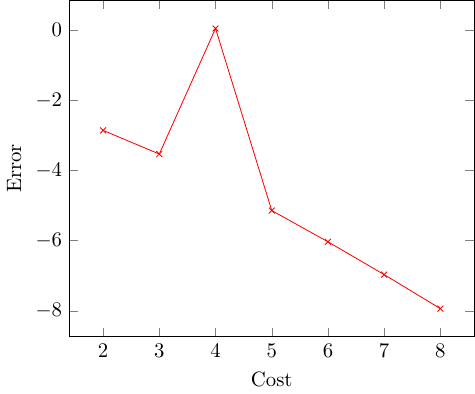

In [4]:
@pgf Axis(
    {
        xlabel = "Cost",
        ylabel = "Error",
    },
    Plot(
        {
            color = "red",
            mark  = "x"
        },
        Coordinates(
            [
                (2, -2.8559703),
                (3, -3.5301677),
                (4, 0.050655),
                (5, -5.1413136),
                (6, -6.0322865),
                (7, -6.9675052),
                (8, -7.9377747),
            ]
        ),
    ),
)

# Gaussian auxiliary charge density

By convention this auxiliary charge density is negative

$$
\rho_{\mathrm{aux}}(\mathbf{r}) =
-\frac{(2\eta)^3}{(2\pi)^{3/2}}
\sum_{I=1}^{P} Z_{I}
\exp\left[-2\eta^2(\mathbf{r} - \mathbf{R}_{I})^2\right]
$$

The multiplying factor is to ensure normalization of charge density.

In [7]:
function gen_Rhoe_aux(
    eta::Float64, atoms::Atoms, Zvals::Array{Float64,1}, pw::PWGrid
)
    #
    Npoints = prod(pw.Ns)
    Rhoe_aux = zeros(Float64,Npoints)
    Natoms = atoms.Natoms
    atm2species = atoms.atm2species
    #
    for ip = 1:Npoints
        r = pw.r[:,ip]
        for ia = 1:Natoms
            isp = atm2species[ia]
            R = atoms.positions[:,ia]
            Z = Zvals[isp]
            dr2 = dot(r-R,r-R)
            Rhoe_aux[ip] = Rhoe_aux[ip] + Z*exp(-2*eta^2*dr2)
        end
    end
    return -(2*eta)^3/((2*pi)^1.5)*Rhoe_aux
end

gen_Rhoe_aux (generic function with 1 method)